In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
tesla = pd.read_csv('Tesla.csv')
tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [5]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [6]:
print(f'Tesla Dateset Contains stock Price between {tesla.Date.min()} to  {tesla.Date.max()}')
print(f'Total Day = {(tesla.Date.max() - tesla.Date.min()).days} Days')

Tesla Dateset Contains stock Price between 2010-06-29 00:00:00 to  2017-03-17 00:00:00
Total Day = 2453 Days


In [7]:
tesla.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


<AxesSubplot: >

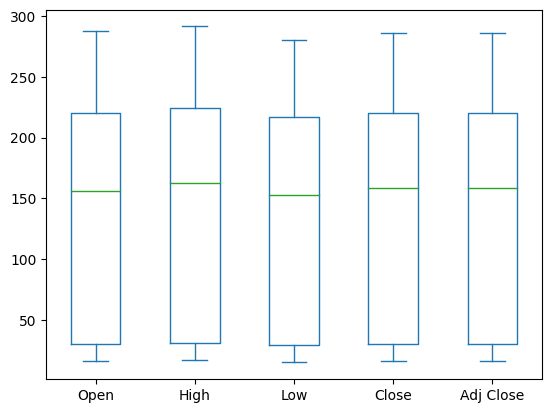

In [8]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [9]:
layout = go.Layout(
     title='Tesla Stock Price',
     xaxis=dict(
     title='Date',
     titlefont=dict(
     family='Courier New, monospace',
     size=10,
     color='#7f7f7f'
     )
    ),
    yaxis=dict(
     title='Price',
     titlefont=dict(
     family='Courier New, monospace',
     size=10,
     color='#7f7f7f'
     )
    ) 
)    
tesla_data = [{'x':tesla['Date'],'y':tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)

In [10]:
 iplot(plot)

In [11]:
#Regression Model
from sklearn.model_selection import train_test_split

#preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Evalution
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [12]:
#splitting the data into Train and Test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [13]:
#Feature Scaling
scaler = StandardScaler().fit(X_train)

In [14]:
#liner Regression
from sklearn.linear_model import LinearRegression

In [15]:
#creating a liner Model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [16]:
#plot Actual and Predicted values for Train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

In [17]:
iplot(plot2)

In [18]:
#Calculate Score for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.7932524122226075	0.7951980134146517
MSE       1833.9196066020397	1823.143839819531

